# SLURM NOTEBOOK
Goal: Matapos tong network analysis by 2024! Lezzgo!

## 1. Nodal Analysis
Here, we want to show the evolution of the network by filtering the cummulative distribution by increment of 0.1

In [2]:
import argparse
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from itertools import product
from concurrent.futures import ThreadPoolExecutor

In [17]:
# Function to calculate Jaccard distance
def jaccard_distance(set1, set2):
    intersection = len(set1 & set2)
    union = len(set1 | set2)
    return 1 - intersection / union if union != 0 else 1

# Function to process a single pair
def process_pair(df, pair):
    healthy_module, diseased_module = pair
    healthy_genes = set(df[df["healthy"] == healthy_module]["genelist"])
    diseased_genes = set(df[df["diseased"] == diseased_module]["genelist"])
    distance = jaccard_distance(healthy_genes, diseased_genes)
    print(f"Jaccard distance for {healthy_module} and {diseased_module} is {distance}..\n")
    return (healthy_module, diseased_module, distance)

def plot_jaccard_distance(matrix, healthy_modules, diseased_modules, title="jaccard_distance_matrix.png"):
    # Plot the Jaccard distance matrix
    plt.figure(figsize=(10, 8))
    cmap = plt.get_cmap("RdBu_r")
    plt.imshow(matrix, interpolation="nearest", cmap=cmap, aspect="auto", vmin=0, vmax=1)
    # Add labels and title
    plt.xticks(ticks=np.arange(len(diseased_modules)), labels=diseased_modules, rotation=45, ha="right")
    plt.yticks(ticks=np.arange(len(healthy_modules)), labels=healthy_modules)
    plt.colorbar(label="Jaccard Distance")
    plt.title("Jaccard Distance Matrix")
    plt.tight_layout()

    # Save the plot
    plt.savefig(title, dpi=300, format="png")

In [27]:

input_file = "modules_healthyVsdiseased.csv"

df = pd.read_csv(input_file)

healthy_modules = df["healthy"].unique()
diseased_modules = df["diseased"].unique()
print(len(healthy_modules))
print(len(diseased_modules))


10
21


In [25]:
module_pairs = list(product(healthy_modules, diseased_modules))

# Generate all pairs of (healthy, diseased) modules
process_pair(df, module_pairs[1])

Jaccard distance for turquoise and bisque1 is 0.9921894371435656..



('turquoise', 'bisque1', 0.9921894371435656)

In [31]:
d = df.groupby("healthy")["genelist"].apply(list).to_dict()
print(set(d['black']))

{'OR56B1', 'OLFML2A', 'FAM161A', 'DLEU7', 'SLC1A6', 'SLC23A1', 'PRG3', 'RXRB', 'OR5AK2', 'CRHR2', 'NPY5R', 'SLC7A14', 'DEFB116', 'SLC25A19', 'ZNF211', 'ENAM', 'NEIL3', 'PABPN1', 'VAC14', 'VPS35', 'GFRA4', 'SNAPC1', 'DSC1', 'TRPV2', 'USP36', 'GPR78', 'ANKRD16', 'RALGAPB', 'TIMELESS', 'CAMK2G', 'RETNLB', 'C7', 'PPIG', 'ZBTB8A', 'IPO9', 'GON4L', 'ZNF333', 'MGP', 'CERK', 'GDPD2', 'ENPP3', 'TULP1', 'TYSND1', 'OR4X2', 'DUS1L', 'KRT78', 'PDDC1', 'TMEM5', 'ZNF526', 'ARR3', 'CCDC79', 'PLD6', 'WBP1', 'EEF2K', 'TMEM115', 'B4GALNT1', 'MYO9A', 'C10orf128', 'ELL3', 'LSM10', 'KRTAP6-1', 'MDGA1', 'MRPL27', 'MRO', 'TPM3', 'ZFP14', 'ZSCAN18', 'CABP2', 'LACRT', 'EPM2A', 'IL18', 'CALCOCO2', 'TTLL11', 'TMEM43', 'NBPF10', 'PHF11', 'ASL', 'KHDC1', 'SH3GLB2', 'PLLP', 'ARFGAP2', 'RGS12', 'DNHD1', 'ZNF614', 'C8orf44', 'RNF214', 'CCDC125', 'ZCCHC11', 'FEZF1', 'NOX4', 'LY6K', 'LHX6', 'SDS', 'P2RX3', 'SETD6', 'ROBO3', 'UGT2B28', 'GGT7', 'LGI4', 'SPON2', 'BMPR1A', 'HNRNPH1', 'TXNL1', 'B4GALNT4', 'KCNA1', 'RDH13', '

In [49]:
df = pd.read_csv("genexdata/txt/genex_diseased.txt", sep="\t", index_col=0)
df.head(5)

,SEP2017092S,SEP2017096F,SEP2017123S,SEP2018001S,SEP2018020S,SEP2018021S,SEP2018023S,SEP2018024S,SEP2018028S,SEP2018034S,...,SEP2015013S,SEP2015016S,SEP2015018S,SEP2015025S,SEP2015028S,SEP2015029S,SEP2016004S,SEP2016005S,SEP2016008S,SEP2016010S
Genes,,,,,,,,,,,,,,,,,,,,,
44986,2.952252,2.673135,2.814241,2.804333,2.851326,2.784067,2.769862,2.868091,2.874144,2.954699,...,2.720698,2.956220,2.824991,2.784988,2.763737,2.809708,2.848166,2.778902,2.757814,2.946270
44988,2.158657,2.279549,2.150568,2.199942,2.164761,2.208322,2.160481,2.090174,2.119359,2.105021,...,2.046796,2.078167,2.109190,2.306390,2.139009,2.133344,2.211435,2.207825,2.060559,2.164898
44989,2.172059,2.126129,2.164558,2.188442,2.088529,2.145444,2.143467,2.116668,2.010213,2.082657,...,2.241171,2.195395,2.123630,2.074012,2.156351,2.153361,2.127179,2.235716,2.221631,2.029386
44990,2.403286,2.626096,2.503480,2.432957,2.491320,2.661239,2.390457,2.458772,2.234190,2.486166,...,2.405405,2.450924,2.351069,2.608903,2.434856,2.450148,2.370001,2.449419,2.320761,2.396060
44991,3.070612,3.139725,3.156563,3.125751,2.985857,3.052404,3.047408,3.122955,3.119979,3.044498,...,3.227597,2.899292,3.080803,3.121656,3.198017,3.153220,3.013133,3.040459,3.321848,3.204374


In [58]:
membership = pd.read_csv("modules_healthyVsdiseased-powered.csv", header=0, names=["gene", "setA_color", "setB_color"])
membership.head(5)

,gene,setA_color,setB_color
0,44986,turquoise,mediumorchid
1,44988,salmon2,black
2,44989,blue,ivory
3,44990,salmon2,darkseagreen4
4,44991,brown,darkred


In [152]:
def calculate_avg_expression(module_genes, expression_data):
    """
    Calculate the average expression profile for a module.
    """
    return expression_data.loc[module_genes].mean(axis=1)

In [153]:
setA_modules = membership.groupby("setA_color")["gene"].apply(list).to_dict()
setA_avg = {module: calculate_avg_expression(genes, df) for module, genes in setA_modules.items()}

In [154]:
setA_avg

{'antiquewhite2': Genes
 45171      3.033427
 45176      3.048912
 A2M        2.146649
 ABCG2      2.169313
 ABHD1      2.146870
              ...   
 ZNF781     2.163347
 ZNF821     2.190643
 ZNF84      2.296040
 ZNF85      2.339401
 ZSCAN12    2.152848
 Length: 823, dtype: float64,
 'blue1': Genes
 45183     2.147128
 45261     2.185341
 A4GALT    2.106238
 AACS      2.183232
 AAGAB     2.518186
             ...   
 ZSWIM4    2.298635
 ZSWIM6    2.780767
 ZUFSP     2.334981
 ZXDC      2.595485
 ZZEF1     2.497878
 Length: 2907, dtype: float64,
 'blueviolet': Genes
 ABCC3     2.653646
 ANKRA2    2.465353
 ANO1      2.318149
 ARPC1B    3.102617
 ASCC1     2.568238
             ...   
 VEZT      2.367234
 YWHAE     3.123859
 ZNF16     2.180905
 ZNF24     2.547648
 ZNF273    2.243273
 Length: 117, dtype: float64,
 'brown2': Genes
 44988      2.153182
 ABCC1      2.475603
 ACMSD      2.319325
 ADAMTS4    2.153111
 ADH1A      2.159318
              ...   
 ZNF575     2.135728
 ZNF652     3

In [171]:
from scipy.stats import pearsonr
from sklearn.metrics import mutual_info_score
from scipy.stats import wasserstein_distance

def calculate_correlation(moduleA_avg, moduleB_avg):
    """
    Calculate Pearson correlation between two modules.
    Filters for common genes between the two modules and calculates the correlation.
    If no common genes exist, return corrval = None, pval = 1.
    """
    # # Find common genes (index names)
    # common_genes = moduleA_avg.index.intersection(moduleB_avg.index)
    # print(common_genes)

    # # If there are no common genes, return None for correlation and p-value = 1
    # if len(common_genes) < 2:
    #     return np.nan, np.nan

    # # Filter both moduleA_avg and moduleB_avg to include only the common genes
    # moduleA_avg_filtered = moduleA_avg[common_genes]
    # print(moduleA_avg_filtered)
    # moduleB_avg_filtered = moduleB_avg[common_genes]
    # print(moduleB_avg_filtered)
    
    # Calculate Pearson correlation
    mi = wasserstein_distance(moduleA_avg, moduleB_avg)

    return mi

In [101]:
import pandas as pd
# Load data
def load_data(membership_file, expression_file_A, expression_file_B):
    """
    Load the membership and expression data.
    """
    # Load membership data
    membership = pd.read_csv(membership_file, header=0, names=["gene", "setA_color", "setB_color"])
    
    # Load expression data
    expression_A = pd.read_csv(expression_file_A, sep="\t", index_col=0)  # Rows: genes, Columns: samples
    expression_B = pd.read_csv(expression_file_B, sep="\t", index_col=0)  # Rows: genes, Columns: samples
    
    return membership, expression_A, expression_B

In [136]:
membership_file = "modules_nonshock30Vsshock15.csv"
expression_file_A = "genexdata/meowth/genex2_preshock.txt"
expression_file_B = "genexdata/meowth/genex2_shock.txt"
membership, expression_A, expression_B = load_data(membership_file, expression_file_A, expression_file_B)

In [137]:
# Group genes by module membership
setA_modules = membership.groupby("setA_color")["gene"].apply(list).to_dict()
setB_modules = membership.groupby("setB_color")["gene"].apply(list).to_dict()
print(len(setA_modules.keys()), len(setB_modules.keys()))

25 5


In [156]:
# Calculate average expression for each module
setA_avg = {module: calculate_avg_expression(genes, expression_A) for module, genes in setA_modules.items()}
setB_avg = {module: calculate_avg_expression(genes, expression_B) for module, genes in setB_modules.items()}

In [157]:
a = setA_avg['antiquewhite2']
np.shape(a)

(823,)

In [158]:
b = setB_avg['yellow']
np.shape(b)

(59,)

In [170]:
calculate_correlation(a,a)

1.0

In [180]:
np.flip(np.sort(a))

array([3.82551492, 3.60378143, 3.51961417, 3.41707069, 3.41399842,
       3.36057125, 3.32806661, 3.20638921, 3.19205367, 3.18343869,
       3.17708425, 3.17281631, 3.15707077, 3.15258658, 3.15252902,
       3.14499227, 3.14008315, 3.12851595, 3.11908179, 3.11172436,
       3.1082152 , 3.10436867, 3.0933613 , 3.09105402, 3.07256476,
       3.06993104, 3.05052459, 3.04595529, 3.04244028, 3.03413926,
       3.00872713, 3.00008747, 2.9992509 , 2.99605105, 2.96765306,
       2.96440862, 2.96372934, 2.95782524, 2.95654613, 2.95218288,
       2.95208759, 2.95082876, 2.94230508, 2.94114612, 2.94113105,
       2.93452361, 2.93443296, 2.93275782, 2.9212831 , 2.92013697,
       2.91879247, 2.9110346 , 2.89792041, 2.89752812, 2.89468212,
       2.88825923, 2.88557191, 2.88525857, 2.88336622, 2.88327669,
       2.87595137, 2.87027081, 2.86916554, 2.86804296, 2.8670903 ,
       2.86498991, 2.86202275, 2.85822798, 2.85787173, 2.85710021,
       2.85409704, 2.85365301, 2.85086287, 2.85066415, 2.84882

In [65]:
import pandas as pd
import networkx as nx
import numpy as np
from scipy.stats import pearsonr

def load_data(membership_file, exprA_file, exprB_file, adjA_file, adjB_file):
    membership = pd.read_csv(membership_file)
    exprA = pd.read_csv(exprA_file, index_col=0, sep="\t")
    exprB = pd.read_csv(exprB_file, index_col=0, sep="\t")
    adjA = pd.read_csv(adjA_file, index_col=0, sep="\t")
    adjB = pd.read_csv(adjB_file, index_col=0, sep="\t")
    return membership, exprA, exprB, adjA, adjB

def get_top_central_genes(adj_matrix, genes_in_module, top_n=10):
    G = nx.from_pandas_adjacency(adj_matrix)
    subgraph = G.subgraph(genes_in_module)
    centrality = nx.degree_centrality(subgraph)
    sorted_genes = sorted(centrality.items(), key=lambda x: x[1], reverse=True)
    return [gene for gene, _ in sorted_genes[:top_n]]


In [ ]:
def compute_correlation(membership, exprA, exprB, adjA, adjB):
    unique_modules_A = membership.iloc[:, 1].unique()
    unique_modules_B = membership.iloc[:, 2].unique()
    correlation_matrix = pd.DataFrame(index=unique_modules_A, columns=unique_modules_B, dtype=float)
    
    for module_A in unique_modules_A:
        genes_in_A = membership[membership.iloc[:, 1] == module_A].iloc[:, 0].values
        top_genes_A = get_top_central_genes(adjA, genes_in_A)
        
        for module_B in unique_modules_B:
            genes_in_B = membership[membership.iloc[:, 2] == module_B].iloc[:, 0].values
            top_genes_B = get_top_central_genes(adjB, genes_in_B)
            
            if len(top_genes_A) < 10 or len(top_genes_B) < 10:
                correlation_matrix.loc[module_A, module_B] = np.nan
                continue
            
            exprA_selected = exprA.loc[top_genes_A].mean(axis=0)
            exprB_selected = exprB.loc[top_genes_B].mean(axis=0)
            
            r, _ = pearsonr(exprA_selected, exprB_selected)
            correlation_matrix.loc[module_A, module_B] = r
    
    return correlation_matrix

In [66]:
membership_file = "modules_nonshock30Vsshock15.csv"
expression_file_A = "genexdata/meowth/genex2_preshock.txt"
expression_file_B = "genexdata/meowth/genex2_shock.txt"
adjA_file = "sepsis_only.ap_mi_adjPowrdmatrix.txt"
adjB_file = "shock_only.ap_mi_adjPowrdmatrix.txt"
    
membership, exprA, exprB, adjA, adjB = load_data(membership_file, expression_file_A, expression_file_B, adjA_file, adjB_file)



In [67]:
exprA.head(5)

,LEP2017057F,LEP2017069F,SEP2017086F,SEP2017092S,SEP2017096F,SEP2017110S,SEP2017117F,SEP2017118F,SEP2017119F,SEP2017120F,...,SEP2015027S,SEP2015029S,SEP2016001S,SEP2016003F,SEP2016004S,SEP2016006F,SEP2016007F,SEP2016008S,SEP2016009F,SEP2016013S
Genes,,,,,,,,,,,,,,,,,,,,,
44986,2.838547,2.838547,2.841736,2.952252,2.673135,2.914553,2.794230,2.848066,2.839665,2.730750,...,2.907869,2.809708,2.829126,2.899238,2.848166,2.915837,2.798106,2.757814,2.883406,2.731807
44988,2.189162,2.189162,2.238255,2.158657,2.279549,2.065161,2.102865,2.248493,2.076845,2.281057,...,2.189753,2.133344,2.146729,2.087721,2.211435,2.238396,2.162409,2.060559,2.294619,2.129022
44989,2.088629,2.088629,2.153590,2.172059,2.126129,2.279686,2.067946,2.220206,2.068981,2.036297,...,2.134939,2.153361,2.132491,2.151576,2.127179,2.127374,2.062366,2.221631,2.169300,2.039994
44990,2.485706,2.485706,2.451382,2.403286,2.626096,2.638163,2.353815,2.451081,2.429448,2.469251,...,2.442030,2.450148,2.554593,2.494391,2.370001,2.573549,2.447798,2.320761,2.303411,2.424566
44991,3.140936,3.140936,3.162704,3.070612,3.139725,3.174894,2.979269,3.042062,3.036270,3.097974,...,2.971560,3.153220,3.037622,3.030293,3.013133,3.079061,3.114047,3.321848,2.934877,2.978384


In [39]:
membership.head(5)

,genelist,nonshock,shock
0,44986,indianred1,grey
1,44988,brown2,grey
2,44989,chocolate4,grey
3,44990,firebrick2,grey
4,44991,palevioletred1,grey


In [6]:
unique_modules_A = membership.iloc[:, 1].unique()
unique_modules_B = membership.iloc[:, 2].unique()
correlation_matrix = pd.DataFrame(index=unique_modules_A, columns=unique_modules_B, dtype=float)
print(unique_modules_A)
print(unique_modules_B)

['indianred1' 'brown2' 'chocolate4' 'firebrick2' 'palevioletred1'
 'darkorange' 'chocolate3' 'antiquewhite2' 'darksalmon' 'firebrick'
 'blue1' 'deepskyblue' 'tan4' 'mediumpurple2' 'grey' 'blueviolet'
 'hotpink4' 'royalblue2' 'lavenderblush' 'brown4' 'lightskyblue3'
 'magenta1' 'darkgoldenrod3' 'deeppink2' 'moccasin']
['grey' 'yellow' 'blue' 'brown' 'turquoise']


In [45]:
module_A = 'blue1'
genes_in_A_index = membership[membership.iloc[:, 1] == module_A].iloc[:, 0].index
genes_in_A = membership.iloc[genes_in_A_index,0].values
print(genes_in_A)
print(genes_in_A_index)
print(len(genes_in_A)==len(genes_in_A_index))

['45183' '45261' 'A4GALT' ... 'ZUFSP' 'ZXDC' 'ZZEF1']
Int64Index([   21,    23,    29,    32,    38,    42,    54,    56,    59,
               63,
            ...
            16342, 16348, 16351, 16352, 16356, 16361, 16363, 16365, 16371,
            16375],
           dtype='int64', length=2907)
True


In [46]:
module_B = 'yellow'
genes_in_B_index = membership[membership.iloc[:, 2] == module_B].iloc[:, 0].index
genes_in_B = membership.iloc[genes_in_B_index,0].values
print(genes_in_B)
print(genes_in_B_index)
print(len(genes_in_B)==len(genes_in_B_index))

['ABCC1' 'AES' 'AMIGO1' 'ARPP19' 'C14orf132' 'C2orf44' 'C4orf50'
 'C9orf163' 'CHMP2A' 'CTNS' 'CYFIP2' 'DDRGK1' 'DMBX1' 'GBA' 'GEMIN6'
 'GYLTL1B' 'HEPN1' 'HIST1H1T' 'HOPX' 'HSPA4' 'IMPG2' 'INSRR' 'INTS9' 'KEL'
 'KIAA1683' 'LENEP' 'LY6K' 'LY96' 'MAGIX' 'MAP1LC3A' 'MAP7' 'MED29'
 'METTL2B' 'MLYCD' 'MYOT' 'ODF4' 'OR8G5' 'PABPC4' 'PARD6B' 'PARD6G' 'PKIG'
 'RHOV' 'RNMTL1' 'RPS7' 'SCAMP1' 'SIGLEC15' 'SLC25A23' 'SLC46A3' 'SNAI2'
 'STAU2' 'STOML1' 'TPRG1L' 'TPST2' 'VPREB3' 'ZNF138' 'ZNF154' 'ZNF257'
 'ZNF484' 'ZNF662']
Int64Index([   71,   354,   551,   920,  1556,  1754,  1810,  1894,  2667,
             3291,  3390,  3568,  3793,  5328,  5392,  5914,  6054,  6125,
             6275,  6392,  6685,  6728,  6739,  7062,  7116,  7550,  7883,
             7886,  7974,  8008,  8043,  8202,  8250,  8374,  8798,  9481,
             9876,  9996, 10072, 10073, 10534, 11812, 11962, 12095, 12281,
            12671, 12837, 12994, 13166, 13592, 13629, 14656, 14663, 15369,
            15875, 15883, 15941, 1

In [35]:
adjB = np.loadtxt(adjB_file)  
np.shape(adjB)
print(adjB[0][10])

0.0


In [51]:
adjA = np.loadtxt(adjA_file)  
np.shape(adjA)


(16377, 16377)

In [ ]:
# Extract sub-adjacency matrix for the module
sub_adj_matrix = adjB[np.ix_(genes_in_B_index, genes_in_B_index)]
np.shape(sub_adj_matrix)

(59, 59)

In [49]:
# Create a NetworkX graph
G = nx.Graph(sub_adj_matrix)
mapping = {i: genes_in_B[i] for i in range(len(genes_in_B))}
G = nx.relabel_nodes(G, mapping)

In [50]:
# Calculate eigenvector centrality
eigenvector_centrality = nx.eigenvector_centrality(G)
sorted_genes = sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
print(sorted_genes)

[('DMBX1', 0.1649949636365485), ('C4orf50', 0.1646384224542452), ('HOPX', 0.1620059341583637), ('C2orf44', 0.16190002318401073), ('ABCC1', 0.1610240381475065), ('MAGIX', 0.1610240381475065), ('PABPC4', 0.1610240381475065), ('RNMTL1', 0.1610240381475065), ('HSPA4', 0.1610109131908528), ('GYLTL1B', 0.16071789898495953)]


In [54]:
# Extract sub-adjacency matrix for the module
sub_adj_matrixA = adjA[np.ix_(genes_in_A_index, genes_in_B_index)]
np.shape(sub_adj_matrixA)

# Create a NetworkX graph
Ga = nx.Graph(sub_adj_matrixA)
mapping = {i: genes_in_A[i] for i in range(len(genes_in_A))}
Ga = nx.relabel_nodes(Ga, mapping)

# Calculate eigenvector centrality
eigenvector_centralityA = nx.eigenvector_centrality(Ga)
sorted_genesA = sorted(eigenvector_centralityA.items(), key=lambda x: x[1], reverse=True)[:10]
print(sorted_genesA)

[('MMS19', 0.19634014835814873), ('RARB', 0.1953786211028988), ('RPRM', 0.19490972379169624), ('ZNF569', 0.19467330726509322), ('CYP4F2', 0.19460699225064104), ('C10orf82', 0.19456356290981303), ('RAP2A', 0.19454466777410553), ('ASAP1', 0.1944855588650078), ('ACTL6A', 0.12985324748457694), ('MRPL42', 0.12924420823516394)]


In [58]:
genenames_A = [gene for gene, _ in sorted_genesA]
genenames_B = [gene for gene, _ in sorted_genes]
print(genenames_A)
print(genenames_B)

['MMS19', 'RARB', 'RPRM', 'ZNF569', 'CYP4F2', 'C10orf82', 'RAP2A', 'ASAP1', 'ACTL6A', 'MRPL42']
['DMBX1', 'C4orf50', 'HOPX', 'C2orf44', 'ABCC1', 'MAGIX', 'PABPC4', 'RNMTL1', 'HSPA4', 'GYLTL1B']


In [78]:
# Filter exprA to get expression data for the top 10 genes
exprA_top10 = exprA.loc[exprA.index[exprA.index.isin(genenames_A)]]
exprB_top10 = exprB.loc[exprB.index[exprB.index.isin(genenames_B)]]

(10, 61) (10, 19)


In [ ]:
parser = argparse.ArgumentParser(description="Analyze adjacency matrix weights for power-law distribution.")
parser.add_argument("--file", type=str, required=True, help="Path to the CSV file containing the adjacency matrix.")
parser.add_argument("--power", type=int, required=True, help="threshold.")
args = parser.parse_args()

main(args)

In [130]:
from sklearn.decomposition import PCA
# Step 1: Perform PCA on each module
def compute_pc1(data):
    pca = PCA(n_components=1)  # Extract only PC1
    pc1_scores = pca.fit_transform(data.T)  # Transpose to have samples as rows
    return pc1_scores.flatten()  # Convert to 1D array

In [ ]:
pc1_A = compute_pc1(exprA_top10.transpose())
pc1_B = compute_pc1(exprB_top10.transpose())
r, pval = pearsonr(np.abs(pc1_A), np.abs(pc1_B))



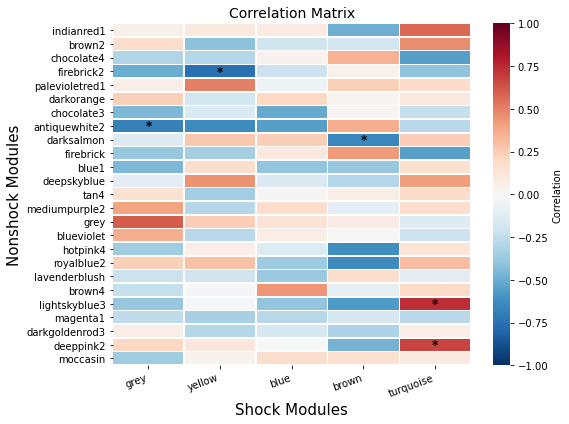

In [155]:
import seaborn as sns
import networkx as nx
import matplotlib.pyplot as plt

def annotate_significance(pval):
        if pval < 0.001:
            return '***'
        elif pval < 0.01:
            return '**'
        elif pval < 0.05:
            return '*'
        else:
            return ''

pval_matrix = pd.read_csv("correxp/nonshockVsshock-corrMat-serial-pval.csv",index_col=0)
correlation_matrix = pd.read_csv("correxp/nonshockVsshock-corrMat-serial-corr.csv",index_col=0)
# Create annotation matrix
annotation_matrix = pval_matrix.applymap(annotate_significance)
annotation_matrix

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    correlation_matrix,
    vmin=-1, vmax=1,  # Set color range for correlation
    cmap="RdBu_r",  # Custom Red-Blue colormap 
    annot=annotation_matrix.values,  # Annotate with significance
    annot_kws={"fontsize": 12, "fontweight": "bold", "color":"black"},
    fmt='',  # No formatting for annotations
    cbar_kws={'label': 'Correlation'},  # Add colorbar label
    linewidths=0.5  # Add lines between cells
)

# Improve label formatting
plt.xticks(rotation=20, ha="right", fontsize=10)
plt.yticks(fontsize=10)
plt.title(f"Correlation Matrix", fontsize=14)
plt.xlabel("Shock Modules", fontsize=15)
plt.ylabel("Nonshock Modules", fontsize=15)

# Adjust layout for better spacing
plt.tight_layout()

# Save the plot
plt.savefig("correxp/nonshockVsshock-corrmat.png", dpi=300, bbox_inches='tight', facecolor="white")  # Save with high resolution and tight b

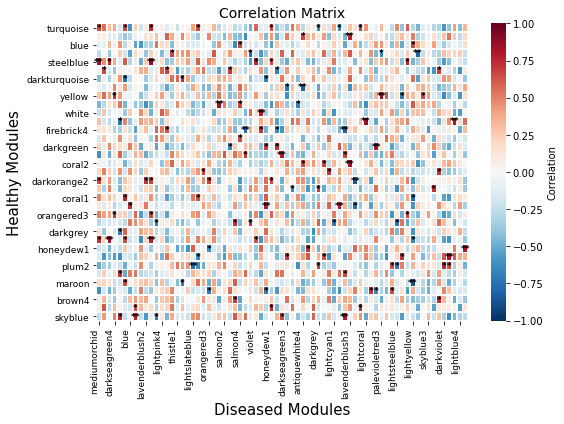

In [160]:
pval_matrix2 = pd.read_csv("correxp/healthyVsdiseased-corrMat-serial-pval.csv",index_col=0)
correlation_matrix2 = pd.read_csv("correxp/healthyVsdiseased-corrMat-serial-corr.csv",index_col=0)
# Create annotation matrix
annotation_matrix2 = pval_matrix2.applymap(annotate_significance)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    correlation_matrix2,
    vmin=-1, vmax=1,  # Set color range for correlation
    cmap="RdBu_r",  # Custom Red-Blue colormap 
    annot=annotation_matrix2.values,  # Annotate with significance
    annot_kws={"fontsize": 9, "fontweight": "bold", "color":"black"},
    fmt='',  # No formatting for annotations
    cbar_kws={'label': 'Correlation'},  # Add colorbar label
    linewidths=0.5  # Add lines between cells
)

# Improve label formatting
plt.xticks(rotation=90, ha="right", fontsize=9)
plt.yticks(fontsize=9)
plt.title(f"Correlation Matrix", fontsize=14)
plt.xlabel("Diseased Modules", fontsize=15)
plt.ylabel("Healthy Modules", fontsize=15)

# Adjust layout for better spacing
plt.tight_layout()

# Save the plot
plt.savefig("correxp/healthyVsdiseased-corrmat.png", dpi=600, bbox_inches='tight', facecolor="white")  # Save with high resolution and tight b

In [162]:
correlation_matrix2.shape

(35, 71)

## Scale-Free Network Analysis

### Healthy Network

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dfhealthy = pd.read_csv("dcor/dcor_nonsepsis.csv", index_col=0)
dfhealthy.head(5)

,44986,44988,44989,44990,44991,44992,44993,44994,44995,44996,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
44986,1.000000,0.200014,0.214839,0.294149,0.385373,0.267290,0.303286,0.340482,0.235240,0.196682,...,0.225776,0.214970,0.270442,0.222654,0.290597,0.358576,0.285301,0.267036,0.268460,0.245763
44988,0.200014,1.000000,0.241691,0.382325,0.222823,0.251389,0.438414,0.503747,0.280835,0.312890,...,0.208756,0.273999,0.229844,0.232178,0.319712,0.188209,0.243928,0.272675,0.321633,0.230490
44989,0.214839,0.241691,1.000000,0.235894,0.226128,0.289636,0.271194,0.244566,0.303629,0.203478,...,0.281290,0.267079,0.227878,0.271571,0.288932,0.329489,0.209949,0.267959,0.353733,0.271332
44990,0.294149,0.382325,0.235894,1.000000,0.298842,0.290599,0.507318,0.288163,0.296719,0.228953,...,0.263554,0.297847,0.482345,0.225944,0.294454,0.321060,0.232713,0.326376,0.304978,0.339216
44991,0.385373,0.222823,0.226128,0.298842,1.000000,0.326801,0.228354,0.322543,0.242522,0.405804,...,0.267736,0.239205,0.214228,0.252909,0.397022,0.269416,0.270645,0.282986,0.270875,0.278962


No handles with labels found to put in legend.


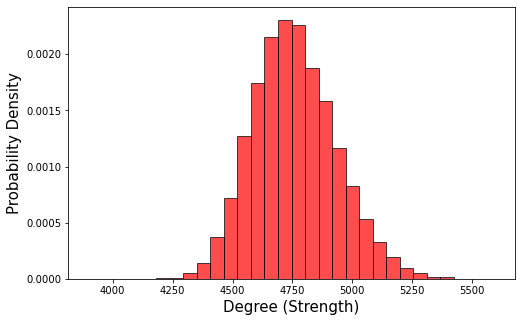

In [105]:
# Compute the degree (sum of weights) for each node
degree = np.sum(dfhealthy, axis=1)

# Plot the degree distribution in log-log scale
plt.figure(figsize=(8, 5))

# Compute the histogram (degree distribution)
counts, bin_edges, _ = plt.hist(degree, bins=30, density=True, facecolor='red', alpha=0.7, edgecolor='black') 
# Plot the degree distribution on a log-log scale
# plt.plot(bin_edges[:-1], counts, 'ro', markersize=5)

# plt.xscale("log")
# plt.yscale("log")

# Labels and title
plt.xlabel("Degree (Strength)", fontsize=15)
plt.ylabel("Probability Density", fontsize=15)
# plt.title("Histogram")
plt.legend(frameon=False, fontsize=12)
plt.savefig("dcor/healthy-adjPow1.png", dpi=600, bbox_inches='tight', facecolor="white")
plt.show()

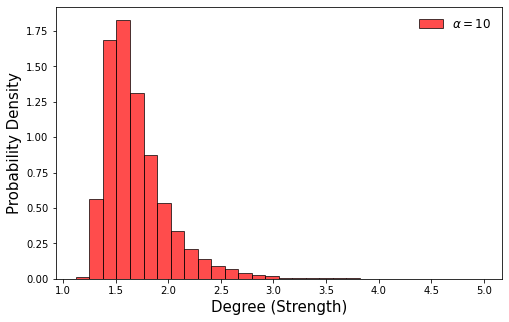

In [99]:
import powerlaw

# Compute the degree (sum of weights) for each node
power = 10
dfhealthy_pow = dfhealthy.pow(power)
# Compute the degree (sum of weights) for each node
degree = np.sum(dfhealthy_pow, axis=1)

# Plot the degree distribution in log-log scale
plt.figure(figsize=(8, 5))

# Compute the histogram (degree distribution)
counts, bin_edges, _ = plt.hist(degree, bins=30, density=True, facecolor='red', alpha=0.7, edgecolor='black', label=fr"$\alpha = {power}$") 
# Plot the degree distribution on a log-log scale
# plt.plot(bin_edges[:-1], counts, 'ro', markersize=5)

# plt.xscale("log")
# plt.yscale("log")

# Labels and title
plt.xlabel("Degree (Strength)", fontsize=15)
plt.ylabel("Probability Density", fontsize=15)
# plt.title("Histogram")
plt.legend(frameon=False, fontsize=12)
plt.savefig(f"dcor/healthy-adjPow{power}.png", dpi=600, bbox_inches='tight', facecolor="white")
plt.show()


/Users/jcbacong/opt/miniconda3/envs/snorlax/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2429: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


Log-normal KS statistic:  0.9264434267570374  p-value:  0.0
Pareto KS statistic:  0.9459239176894425  p-value:  0.0
Weibull KS statistic:  1.0  p-value:  0.0
Exponential KS statistic:  1.0  p-value:  0.0


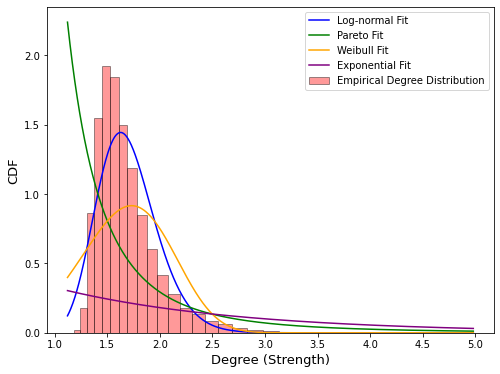

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import lognorm, pareto, weibull_min, expon
from scipy.stats import ks_2samp

# Your degree distribution (empirical data)
# Step 1: Fit the distributions
# Fit Log-normal distribution
shape, loc, scale = lognorm.fit(degree, floc=0)
# Fit Pareto distribution (Power-law)
shape_p, loc_p, scale_p = pareto.fit(degree, floc=0)
# Fit Weibull distribution
shape_w, loc_w, scale_w = weibull_min.fit(degree, floc=0)
# Fit Exponential distribution (as a baseline comparison)
loc_e, scale_e = expon.fit(degree, floc=0)

# Step 2: Calculate CDFs of fitted distributions
# Generate x-values for plotting CDFs
x = np.linspace(min(degree), max(degree), 1000)

# Log-normal CDF
lognorm_cdf = lognorm.pdf(x, shape, loc, scale)
# Pareto CDF
pareto_cdf = pareto.pdf(x, shape_p, loc_p, scale_p)
# Weibull CDF
weibull_cdf = weibull_min.pdf(x, shape_w, loc_w, scale_w)
# Exponential CDF
expon_cdf = expon.pdf(x, loc_e, scale_e)

# Step 3: Empirical CDF of degree data
counts, bin_edges = np.histogram(degree, bins=30, density=True)
empirical_cdf = degree

# Step 4: KS Test between empirical CDF and each fitted CDF
# KS test for log-normal
ks_stat_lognorm, p_val_lognorm = ks_2samp(empirical_cdf, lognorm_cdf[:len(empirical_cdf)])

# KS test for Pareto
ks_stat_pareto, p_val_pareto = ks_2samp(empirical_cdf, pareto_cdf[:len(empirical_cdf)])

# KS test for Weibull
ks_stat_weibull, p_val_weibull = ks_2samp(empirical_cdf, weibull_cdf[:len(empirical_cdf)])

# KS test for Exponential
ks_stat_expon, p_val_expon = ks_2samp(empirical_cdf, expon_cdf[:len(empirical_cdf)])

# Print KS statistics and p-values
print("Log-normal KS statistic: ", ks_stat_lognorm, " p-value: ", p_val_lognorm)
print("Pareto KS statistic: ", ks_stat_pareto, " p-value: ", p_val_pareto)
print("Weibull KS statistic: ", ks_stat_weibull, " p-value: ", p_val_weibull)
print("Exponential KS statistic: ", ks_stat_expon, " p-value: ", p_val_expon)

# Step 5: Plot the degree distribution and the CDFs of the fitted distributions
plt.figure(figsize=(8, 6))
plt.hist(degree, bins=np.logspace(np.log10(min(degree)), np.log10(max(degree)), 30), density=True, facecolor='red', alpha=0.4, edgecolor='black', label="Empirical Degree Distribution")
plt.plot(x, lognorm_cdf, label='Log-normal Fit', color='blue', linestyle='-')
plt.plot(x, pareto_cdf, label='Pareto Fit', color='green', linestyle='-')
plt.plot(x, weibull_cdf, label='Weibull Fit', color='orange', linestyle='-')
plt.plot(x, expon_cdf, label='Exponential Fit', color='purple', linestyle='-')

# plt.xscale('log')
# plt.yscale('log')
plt.xlabel('Degree (Strength)', fontsize=13)
plt.ylabel('CDF', fontsize=13)
plt.legend()
plt.show()


Estimated x_min: 1.51


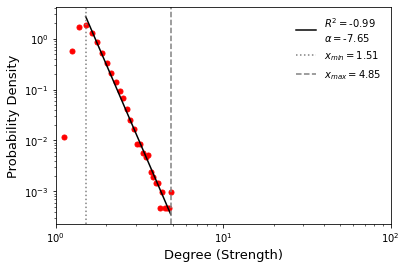

In [100]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
from matplotlib.ticker import FuncFormatter

# Compute the histogram (degree distribution)
# counts, bin_edges = np.histogram(degree, bins=np.logspace(np.log10(min(degree[degree>0])), np.log10(max(degree)), 30), density=True)

power = 10
# Plot the degree distribution on a log-log scale
plt.plot(bin_edges[:-1], counts, 'ro', markersize=5)

# Define the range for the linear fit (e.g., from the 5th to 20th percentile of degrees)
x_vals = bin_edges[:-1]
y_vals = counts

# Choose indices that cover the linear region of the plot
linear_region_mask = (x_vals > 1.5) & (x_vals < 8)  # Example: Filter degrees between 10 and 100 (adjust as needed)

# Linear regression on the selected region
slope, intercept, r_value, p_value, std_err = linregress(np.log(x_vals[linear_region_mask] + 1e-6), np.log(y_vals[linear_region_mask]+1e-6))

fit_y_vals = np.exp(intercept) * (x_vals[linear_region_mask]**slope)

# Plot the linear fit for visualization
plt.plot(x_vals[linear_region_mask], fit_y_vals, '-', color="black", label=r"$R^{2} = $"+f"{r_value:.2f}\n"+r"$\alpha = $"+f"{slope:.2f}")

# Mark the x_min (where the linear region starts)
x_min = min(x_vals[linear_region_mask])
x_max = max(x_vals[linear_region_mask])

plt.axvline(x=x_min, color='gray', linestyle='dotted', label=r"$x_{min} = $"+f"{x_min:.2f}")
plt.axvline(x=x_max, color='gray', linestyle='--', label=r"$x_{max} = $"+f"{x_max:.2f}")

# Display the plot
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Degree (Strength)', fontsize=13)
plt.ylabel('Probability Density', fontsize=13)

# Custom x-axis formatter to show ticks as 10^x
def format_func(value, tick_number):
    return r'$10^{%d}$' % int(np.log10(value))

# Set the x-axis ticks manually at 10^1, 10^2, 10^3, and 10^4
plt.xticks([10**i for i in range(0, 3)])

# Apply the custom formatter
plt.gca().get_xaxis().set_major_formatter(FuncFormatter(format_func))

plt.legend(loc='upper right', frameon=False)


# Print the x_min
print(f"Estimated x_min: {x_min:.2f}")
plt.savefig(f"dcor/healthy-powerlaw{power}.png", dpi=600, bbox_inches='tight', facecolor="white")
plt.show()

(11612, 11612)
Kstat: 0.956
p-value: 0.000


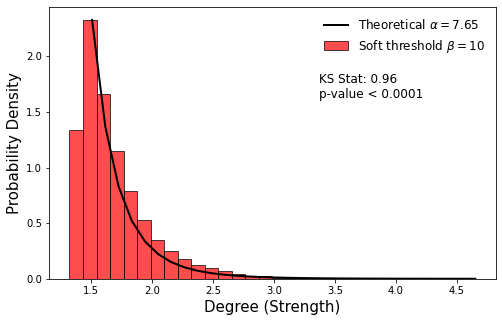

In [101]:
from scipy.stats import chi2_contingency
from scipy.stats import anderson_ksamp

# Step 3: Filter the nodes with strength >= x_min
power=10
alpha=-slope
degree = np.sum(dfhealthy_pow, axis=1)
nodes_to_keep = degree[(degree > x_min) & (degree < x_max)].index  # Get indices of nodes with strength > x_min

# Step 4: Create a new adjacency matrix with filtered nodes
dfhealthy_filtered = dfhealthy_pow.loc[nodes_to_keep, nodes_to_keep]
print(dfhealthy_filtered.shape)


degree = np.sum(dfhealthy_filtered, axis=1)

# Plot the degree distribution in log-log scale
plt.figure(figsize=(8, 5))

# Compute the histogram (degree distribution)
counts, bin_edges, _ = plt.hist(
    degree, bins=30, density=True, facecolor='red', alpha=0.7, edgecolor='black', 
    label=fr"Soft threshold $\beta = {power}$"
)

# Compute the theoretical power-law PDF
xmin = x_min  # Choose minimum value to define the power-law range
x = np.linspace(xmin, max(degree), 30)
theoretical_pdf = (alpha - 1) * xmin**(alpha - 1) * x**(-alpha)
# theoretical_pdf = (xmin**(power - 1)) * (x**-power)  # Power-law formula

# Scale the theoretical PDF to match the empirical histogram
scaling_factor = max(counts) / max(theoretical_pdf)  # Match peak values
theoretical_pdf *= scaling_factor

# Plot the theoretical power-law distribution
plt.plot(x, theoretical_pdf, 'k-', linewidth=2, label=fr"Theoretical $\alpha = {alpha:0.2f}$")

# Annotate KS-statistic and p-value below the legend
# ---- Perform Statistical Tests ----
# Compare theoretical vs empirical
ks_statistic, p_value = ks_2samp(degree, theoretical_pdf)


# Print the results
print(f"Kstat: {ks_statistic:.3f}")
print(f"p-value: {p_value:.3f}")

# Create legend and get its bounding box
legend = plt.legend(frameon=False, fontsize=12)
plt.gcf().canvas.draw()  # Force a draw to update legend size
bbox = legend.get_window_extent().transformed(plt.gca().transAxes.inverted())

# Get bottom position of the legend and place annotation below it
text_y = bbox.y0 - 0.05  # Slightly below legend

# Annotate KS-statistic and p-value below the legend
plt.text(
    bbox.x0, text_y, 
    f"KS Stat: {ks_statistic:.2f}\np-value{' < 0.0001' if p_value < 0.0001 else f': {p_value:.4f}'}", 
    transform=plt.gca().transAxes, fontsize=12, verticalalignment='top'
)


# Labels and title
plt.xlabel("Degree (Strength)", fontsize=15)
plt.ylabel("Probability Density", fontsize=15)
plt.legend(frameon=False, fontsize=12)

# Save and show the plot
plt.savefig(f"dcor/healthy-adjPow{power}_theoretical.png", dpi=600, bbox_inches='tight', facecolor="white")
plt.show()

In [87]:
# Step 3: Filter the nodes with strength >= x_min
degree = np.sum(dfhealthy_pow, axis=1)
nodes_to_keep = degree[(degree > x_min) & (degree < x_max)].index  # Get indices of nodes with strength > x_min

# Step 4: Create a new adjacency matrix with filtered nodes
dfhealthy_filtered = dfhealthy_pow.loc[nodes_to_keep, nodes_to_keep]
print(dfhealthy_filtered.shape)

# Step 5: Save the filtered adjacency matrix to a text file
dfhealthy_filtered.to_csv(f'dcor/healthy_scalefree{power}.csv')
dfhealthy_filtered.head(5)

(11612, 11612)


,44986,44988,44989,44990,44991,44992,44993,44994,44996,45170,...,ZUFSP,ZWILCH,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
44986,1.000000e+00,1.024727e-07,2.094741e-07,4.849227e-06,7.224561e-05,0.000002,6.584444e-06,2.093850e-05,8.662421e-08,4.394243e-07,...,0.000018,3.441767e-07,2.092852e-06,2.994378e-07,0.000004,3.514087e-05,3.573032e-06,0.000002,0.000002,8.038190e-07
44988,1.024727e-07,1.000000e+00,6.801519e-07,6.673068e-05,3.017223e-07,0.000001,2.623300e-04,1.052258e-03,8.993316e-06,1.080476e-06,...,0.000001,1.571769e-07,4.114699e-07,4.552155e-07,0.000011,5.577164e-08,7.457888e-07,0.000002,0.000012,4.231736e-07
44989,2.094741e-07,6.801519e-07,1.000000e+00,5.335450e-07,3.495734e-07,0.000004,2.151832e-06,7.655293e-07,1.216689e-07,4.175852e-06,...,0.000001,3.101265e-06,3.775970e-07,2.181879e-06,0.000004,1.508024e-05,1.663955e-07,0.000002,0.000031,2.162805e-06
44990,4.849227e-06,6.673068e-05,5.335450e-07,1.000000e+00,5.680809e-06,0.000004,1.129277e-03,3.948084e-06,3.957943e-07,3.757542e-06,...,0.000010,1.616951e-06,6.816693e-04,3.467500e-07,0.000005,1.163755e-05,4.658007e-07,0.000014,0.000007,2.017295e-05
44991,7.224561e-05,3.017223e-07,3.495734e-07,5.680809e-06,1.000000e+00,0.000014,3.855599e-07,1.218643e-05,1.211065e-04,2.389573e-06,...,0.000050,1.892625e-06,2.035900e-07,1.070627e-06,0.000097,2.014804e-06,2.108608e-06,0.000003,0.000002,2.853927e-06


### Diseased Network

In [89]:
dfdis = pd.read_csv("dcor/dcor_sepsis.csv", index_col=0)
dfdis.head(5)

,44986,44988,44989,44990,44991,44992,44993,44994,44995,44996,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
44986,1.000000,0.364744,0.359013,0.296118,0.380595,0.333333,0.347205,0.297101,0.284358,0.267342,...,0.247920,0.363017,0.374597,0.289313,0.245510,0.347026,0.302167,0.232534,0.301946,0.306510
44988,0.364744,1.000000,0.329111,0.291948,0.253018,0.234916,0.271549,0.267555,0.309088,0.418751,...,0.230663,0.237248,0.323692,0.233869,0.243802,0.220913,0.265572,0.232043,0.228590,0.394126
44989,0.359013,0.329111,1.000000,0.320340,0.306140,0.319266,0.254102,0.333213,0.346515,0.234084,...,0.195732,0.308249,0.378603,0.280040,0.317658,0.410510,0.328262,0.217048,0.393091,0.307008
44990,0.296118,0.291948,0.320340,1.000000,0.260044,0.204574,0.428417,0.194844,0.252390,0.223573,...,0.311978,0.310329,0.439364,0.248269,0.365222,0.307674,0.204796,0.225649,0.300424,0.330492
44991,0.380595,0.253018,0.306140,0.260044,1.000000,0.231103,0.344360,0.417765,0.311279,0.251989,...,0.286037,0.258892,0.275605,0.253161,0.233538,0.286772,0.290549,0.212686,0.207825,0.252186


No handles with labels found to put in legend.


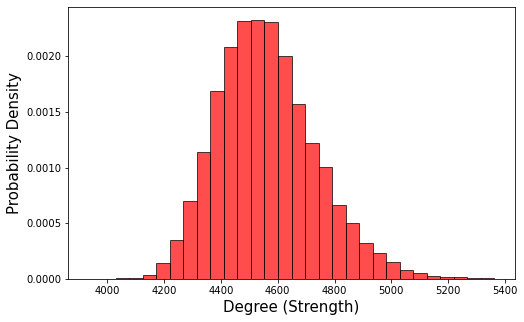

In [109]:
# Compute the degree (sum of weights) for each node
degree = np.sum(dfdis, axis=1)

# Plot the degree distribution in log-log scale
plt.figure(figsize=(8, 5))

# Compute the histogram (degree distribution)
counts, bin_edges, _ = plt.hist(degree, bins=30, density=True, facecolor='red', alpha=0.7, edgecolor='black') 
# Plot the degree distribution on a log-log scale
# plt.plot(bin_edges[:-1], counts, 'ro', markersize=5)

# plt.xscale("log")
# plt.yscale("log")

# Labels and title
plt.xlabel("Degree (Strength)", fontsize=15)
plt.ylabel("Probability Density", fontsize=15)
# plt.title("Histogram")
plt.legend(frameon=False, fontsize=12)
plt.savefig("dcor/diseased-adjPow1.png", dpi=600, bbox_inches='tight', facecolor="white")
plt.show()

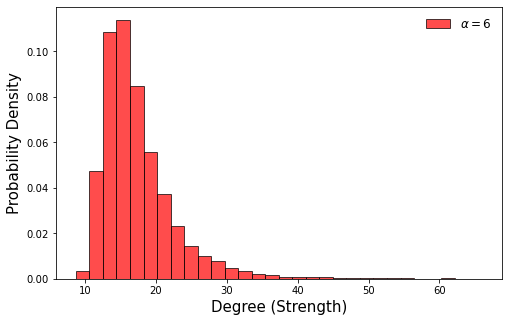

In [111]:
# Compute the degree (sum of weights) for each node
power = 6
dfdis_pow = dfdis.pow(power)
# Compute the degree (sum of weights) for each node
degree = np.sum(dfdis_pow, axis=1)

# Plot the degree distribution in log-log scale
plt.figure(figsize=(8, 5))

# Compute the histogram (degree distribution)
counts, bin_edges, _ = plt.hist(degree, bins=30, density=True, facecolor='red', alpha=0.7, edgecolor='black', label=fr"$\alpha = {power}$") 
# Plot the degree distribution on a log-log scale
# plt.plot(bin_edges[:-1], counts, 'ro', markersize=5)

# plt.xscale("log")
# plt.yscale("log")

# Labels and title
plt.xlabel("Degree (Strength)", fontsize=15)
plt.ylabel("Probability Density", fontsize=15)
# plt.title("Histogram")
plt.legend(frameon=False, fontsize=12)
plt.savefig(f"dcor/diseased-adjPow{power}.png", dpi=600, bbox_inches='tight', facecolor="white")
plt.show()

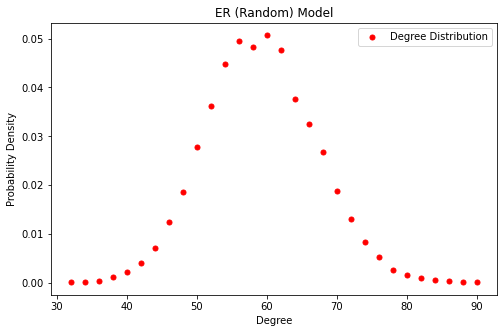

KS statistic: 0.23333333333333334, p-value: 0.39294501397971776


In [177]:
from scipy import stats

# Step 1: Generate a scale-free network using the Barabási-Albert model
import networkx as nx 

n_nodes = len(degree)  # Number of nodes

p = np.mean(degree)/(n_nodes-1)  # Probability of edge creation

# Create a random graph with an exponential degree distribution
G_exp = nx.erdos_renyi_graph(n_nodes, p)

# Step 2: Create the adjacency matrix from the graph
M_binary = nx.to_numpy_array(G_exp)

# Step 3: Calculate the degree of each node in the network
degree1 = np.array([G_exp.degree(node) for node in G_exp.nodes])

# Plot the degree distribution in log-log scale
plt.figure(figsize=(8, 5))

# Compute the histogram (degree distribution)
counts1, bin_edges1 = np.histogram(degree1, bins=30, density=True)

# Plot the degree distribution on a log-log scale
plt.plot(bin_edges1[:-1], counts1, 'ro', markersize=5, label="Degree Distribution")
# plt.xscale("log")
# plt.yscale("log")

# Labels and title
plt.xlabel("Degree")
plt.ylabel("Probability Density")
plt.title("ER (Random) Model")
plt.legend()
plt.savefig("diseased-mcp4Pow5mirandom.png", dpi=600, bbox_inches='tight', facecolor="white")
plt.show()

# Perform a KS test to compare the two distributions
ks_stat, ks_p_value = stats.ks_2samp(counts, counts1)
print(f"KS statistic: {ks_stat}, p-value: {ks_p_value}")

Estimated x_min: 14.27


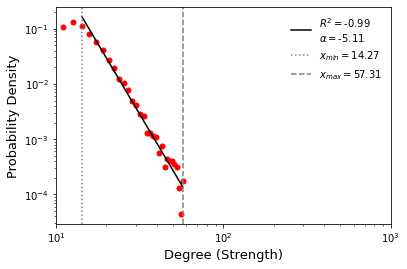

In [116]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
from matplotlib.ticker import FuncFormatter

# Compute the histogram (degree distribution)
# counts, bin_edges = np.histogram(degree, bins=np.logspace(np.log10(min(degree[degree>0])), np.log10(max(degree)), 30), density=True)

power = 6
# Plot the degree distribution on a log-log scale
plt.plot(bin_edges[:-1], counts, 'ro', markersize=5)

# Define the range for the linear fit (e.g., from the 5th to 20th percentile of degrees)
x_vals = bin_edges[:-1]
y_vals = counts

# Choose indices that cover the linear region of the plot
linear_region_mask = (x_vals > 13) & (x_vals < 100)  # Example: Filter degrees between 10 and 100 (adjust as needed)

# Linear regression on the selected region
slope, intercept, r_value, p_value, std_err = linregress(np.log(x_vals[linear_region_mask] + 1e-6), np.log(y_vals[linear_region_mask]+1e-6))

fit_y_vals = np.exp(intercept) * (x_vals[linear_region_mask]**slope)

# Plot the linear fit for visualization
plt.plot(x_vals[linear_region_mask], fit_y_vals, '-', color="black", label=r"$R^{2} = $"+f"{r_value:.2f}\n"+r"$\alpha = $"+f"{slope:.2f}")

# Mark the x_min (where the linear region starts)
x_min = min(x_vals[linear_region_mask])
x_max = max(x_vals[linear_region_mask])

plt.axvline(x=x_min, color='gray', linestyle='dotted', label=r"$x_{min} = $"+f"{x_min:.2f}")
plt.axvline(x=x_max, color='gray', linestyle='--', label=r"$x_{max} = $"+f"{x_max:.2f}")

# Display the plot
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Degree (Strength)', fontsize=13)
plt.ylabel('Probability Density', fontsize=13)

# Custom x-axis formatter to show ticks as 10^x
def format_func(value, tick_number):
    return r'$10^{%d}$' % int(np.log10(value))

# Set the x-axis ticks manually at 10^1, 10^2, 10^3, and 10^4
plt.xticks([10**i for i in range(1, 4)])

# Apply the custom formatter
plt.gca().get_xaxis().set_major_formatter(FuncFormatter(format_func))

plt.legend(loc='upper right', frameon=False)


# Print the x_min
print(f"Estimated x_min: {x_min:.2f}")
plt.savefig(f"dcor/diseased-powerlaw{power}.png", dpi=600, bbox_inches='tight', facecolor="white")
plt.show()

(11668, 11668)
Kstat: 1.000
p-value: 0.000


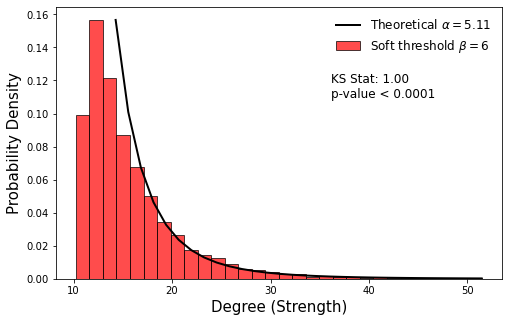

In [117]:
from scipy.stats import chi2_contingency
from scipy.stats import anderson_ksamp

# Step 3: Filter the nodes with strength >= x_min
power=6
alpha=-slope
degree = np.sum(dfdis_pow, axis=1)
nodes_to_keep = degree[(degree > x_min) & (degree < x_max)].index  # Get indices of nodes with strength > x_min

# Step 4: Create a new adjacency matrix with filtered nodes
dfdis_filtered = dfdis_pow.loc[nodes_to_keep, nodes_to_keep]
print(dfdis_filtered.shape)


degree = np.sum(dfdis_filtered, axis=1)

# Plot the degree distribution in log-log scale
plt.figure(figsize=(8, 5))

# Compute the histogram (degree distribution)
counts, bin_edges, _ = plt.hist(
    degree, bins=30, density=True, facecolor='red', alpha=0.7, edgecolor='black', 
    label=fr"Soft threshold $\beta = {power}$"
)

# Compute the theoretical power-law PDF
xmin = x_min  # Choose minimum value to define the power-law range
x = np.linspace(xmin, max(degree), 30)
theoretical_pdf = (alpha - 1) * xmin**(alpha - 1) * x**(-alpha)
# theoretical_pdf = (xmin**(power - 1)) * (x**-power)  # Power-law formula

# Scale the theoretical PDF to match the empirical histogram
scaling_factor = max(counts) / max(theoretical_pdf)  # Match peak values
theoretical_pdf *= scaling_factor

# Plot the theoretical power-law distribution
plt.plot(x, theoretical_pdf, 'k-', linewidth=2, label=fr"Theoretical $\alpha = {alpha:0.2f}$")

# Annotate KS-statistic and p-value below the legend
# ---- Perform Statistical Tests ----
# Compare theoretical vs empirical
ks_statistic, p_value = ks_2samp(degree, theoretical_pdf)


# Print the results
print(f"Kstat: {ks_statistic:.3f}")
print(f"p-value: {p_value:.3f}")

# Create legend and get its bounding box
legend = plt.legend(frameon=False, fontsize=12)
plt.gcf().canvas.draw()  # Force a draw to update legend size
bbox = legend.get_window_extent().transformed(plt.gca().transAxes.inverted())

# Get bottom position of the legend and place annotation below it
text_y = bbox.y0 - 0.05  # Slightly below legend

# Annotate KS-statistic and p-value below the legend
plt.text(
    bbox.x0, text_y, 
    f"KS Stat: {ks_statistic:.2f}\np-value{' < 0.0001' if p_value < 0.0001 else f': {p_value:.4f}'}", 
    transform=plt.gca().transAxes, fontsize=12, verticalalignment='top'
)


# Labels and title
plt.xlabel("Degree (Strength)", fontsize=15)
plt.ylabel("Probability Density", fontsize=15)
plt.legend(frameon=False, fontsize=12)

# Save and show the plot
plt.savefig(f"dcor/diseased-adjPow{power}_theoretical.png", dpi=600, bbox_inches='tight', facecolor="white")
plt.show()

In [118]:
# Step 3: Filter the nodes with strength >= x_min
nodes_to_keep = degree[(degree > x_min) & (degree < x_max)].index  # Get indices of nodes with strength > x_min

# Step 4: Create a new adjacency matrix with filtered nodes
diseased_pow = dfdis_pow.loc[nodes_to_keep, nodes_to_keep]
print(diseased_pow.shape)

# Step 5: Save the filtered adjacency matrix to a text file
diseased_pow.to_csv(f'dcor/diseased_scalefree{power}.csv')
diseased_pow.head(5)



(5724, 5724)


,44986,44991,44992,44993,44994,45170,45171,45173,45175,45178,...,ZRANB2,ZSCAN16,ZSCAN18,ZSCAN21,ZSCAN5A,ZSWIM3,ZUFSP,ZXDA,ZXDC,ZZEF1
44986,1.000000,0.003039,0.001372,0.001752,0.000688,0.002336,0.002755,0.000077,0.002268,0.002206,...,0.000331,0.000515,0.000329,0.002336,0.004316,0.000425,0.001280,0.002763,0.000219,0.000758
44991,0.003039,1.000000,0.000152,0.001668,0.005316,0.007347,0.000327,0.000065,0.006593,0.000550,...,0.000228,0.003644,0.003287,0.000275,0.000078,0.000958,0.000135,0.000438,0.000162,0.000081
44992,0.001372,0.000152,1.000000,0.000200,0.000072,0.001151,0.000739,0.002030,0.000069,0.001004,...,0.020109,0.000191,0.000209,0.000260,0.000183,0.000058,0.002985,0.000594,0.000182,0.002119
44993,0.001752,0.001668,0.000200,1.000000,0.002630,0.003925,0.000092,0.000405,0.000799,0.000057,...,0.001055,0.000856,0.000477,0.000640,0.000420,0.000480,0.000289,0.000553,0.000143,0.000314
44994,0.000688,0.005316,0.000072,0.002630,1.000000,0.038630,0.000454,0.000219,0.014207,0.000189,...,0.000091,0.000220,0.008729,0.000465,0.000251,0.000878,0.000571,0.000170,0.000533,0.000092


### Non-shock network

In [119]:
dfnonsh = pd.read_csv("dcor/dcor_preshock.csv", index_col=0)
dfnonsh.head(5)

,44986,44988,44989,44990,44991,44992,44993,44994,44995,44996,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
44986,1.000000,0.270313,0.305390,0.377117,0.271709,0.346919,0.389666,0.178827,0.170994,0.230879,...,0.251437,0.219910,0.237874,0.223510,0.209195,0.225740,0.170993,0.305651,0.255662,0.249389
44988,0.270313,1.000000,0.255838,0.208708,0.222271,0.190507,0.187324,0.207095,0.199602,0.287060,...,0.246425,0.171662,0.306526,0.288950,0.237931,0.268214,0.181113,0.235377,0.157975,0.191720
44989,0.305390,0.255838,1.000000,0.203838,0.289745,0.206068,0.202819,0.217723,0.293150,0.197918,...,0.328613,0.251982,0.237685,0.145014,0.215742,0.313031,0.185768,0.334093,0.307645,0.279729
44990,0.377117,0.208708,0.203838,1.000000,0.235521,0.254200,0.331596,0.153168,0.217747,0.234292,...,0.241315,0.263021,0.223512,0.241392,0.343864,0.215380,0.178192,0.181844,0.346978,0.256367
44991,0.271709,0.222271,0.289745,0.235521,1.000000,0.236659,0.230879,0.203184,0.240084,0.223668,...,0.326185,0.205975,0.187665,0.254409,0.234282,0.245974,0.261062,0.311854,0.262370,0.312222


No handles with labels found to put in legend.


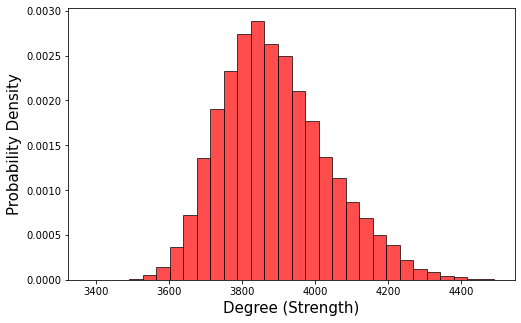

In [147]:
# Compute the degree (sum of weights) for each node
degree = np.sum(dfnonsh, axis=1)

# Plot the degree distribution in log-log scale
plt.figure(figsize=(8, 5))

# Compute the histogram (degree distribution)
counts, bin_edges, _ = plt.hist(degree, bins=30, density=True, facecolor='red', alpha=0.7, edgecolor='black') 
# Plot the degree distribution on a log-log scale
# plt.plot(bin_edges[:-1], counts, 'ro', markersize=5)

# plt.xscale("log")
# plt.yscale("log")

# Labels and title
plt.xlabel("Degree (Strength)", fontsize=15)
plt.ylabel("Probability Density", fontsize=15)
# plt.title("Histogram")
plt.legend(frameon=False, fontsize=12)
plt.savefig("dcor/nonshock-adjPow1.png", dpi=600, bbox_inches='tight', facecolor="white")
plt.show()

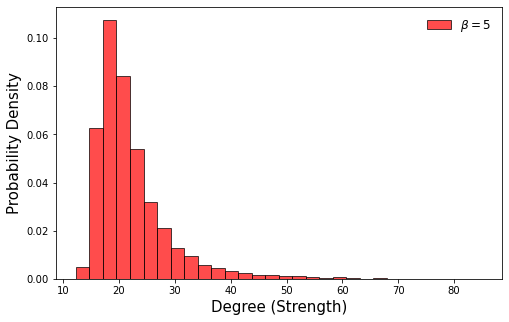

In [150]:
# Compute the degree (sum of weights) for each node
power = 5
dfnonsh_pow = dfnonsh.pow(power)
# Compute the degree (sum of weights) for each node
degree = np.sum(dfnonsh_pow, axis=1)

# Plot the degree distribution in log-log scale
plt.figure(figsize=(8, 5))

# Compute the histogram (degree distribution)
counts, bin_edges, _ = plt.hist(degree, bins=30, density=True, facecolor='red', alpha=0.7, edgecolor='black', label=fr"$\beta = {power}$") 
# Plot the degree distribution on a log-log scale
# plt.plot(bin_edges[:-1], counts, 'ro', markersize=5)

# plt.xscale("log")
# plt.yscale("log")

# Labels and title
plt.xlabel("Degree (Strength)", fontsize=15)
plt.ylabel("Probability Density", fontsize=15)
# plt.title("Histogram")
plt.legend(frameon=False, fontsize=12)
plt.savefig(f"dcor/nonshock-adjPow{power}.png", dpi=600, bbox_inches='tight', facecolor="white")
plt.show()

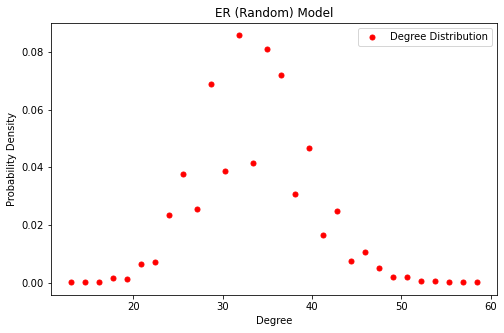

KS statistic: 0.16666666666666666, p-value: 0.8079631540901643


In [117]:
from scipy import stats

# Step 1: Generate a scale-free network using the Barabási-Albert model
import networkx as nx 

n_nodes = len(degree)  # Number of nodes

p = np.mean(degree)/(n_nodes-1)  # Probability of edge creation

# Create a random graph with an exponential degree distribution
G_exp = nx.erdos_renyi_graph(n_nodes, p)

# Step 2: Create the adjacency matrix from the graph
M_binary = nx.to_numpy_array(G_exp)

# Step 3: Calculate the degree of each node in the network
degree1 = np.array([G_exp.degree(node) for node in G_exp.nodes])

# Plot the degree distribution in log-log scale
plt.figure(figsize=(8, 5))

# Compute the histogram (degree distribution)
counts1, bin_edges1 = np.histogram(degree1, bins=30, density=True)

# Plot the degree distribution on a log-log scale
plt.plot(bin_edges1[:-1], counts1, 'ro', markersize=5, label="Degree Distribution")
# plt.xscale("log")
# plt.yscale("log")

# Labels and title
plt.xlabel("Degree")
plt.ylabel("Probability Density")
plt.title("ER (Random) Model")
plt.legend()
plt.savefig("nonshock-miPow5mirandom.png", dpi=600, bbox_inches='tight', facecolor="white")
plt.show()

# Perform a KS test to compare the two distributions
ks_stat, ks_p_value = stats.ks_2samp(counts, counts1)
print(f"KS statistic: {ks_stat}, p-value: {ks_p_value}")

Estimated x_min: 18.35


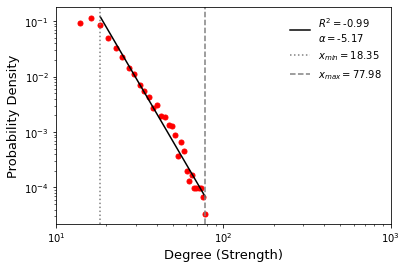

In [154]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
from matplotlib.ticker import FuncFormatter

# Compute the histogram (degree distribution)
# counts, bin_edges = np.histogram(degree, bins=np.logspace(np.log10(min(degree[degree>0])), np.log10(max(degree)), 30), density=True)

power = 5
# Plot the degree distribution on a log-log scale
plt.plot(bin_edges[:-1], counts, 'ro', markersize=5)

# Define the range for the linear fit (e.g., from the 5th to 20th percentile of degrees)
x_vals = bin_edges[:-1]
y_vals = counts

# Choose indices that cover the linear region of the plot
linear_region_mask = (x_vals > 17.5) & (x_vals < 200)  # Example: Filter degrees between 10 and 100 (adjust as needed)

# Linear regression on the selected region
slope, intercept, r_value, p_value, std_err = linregress(np.log(x_vals[linear_region_mask] + 1e-6), np.log(y_vals[linear_region_mask]+1e-6))

fit_y_vals = np.exp(intercept) * (x_vals[linear_region_mask]**slope)

# Plot the linear fit for visualization
plt.plot(x_vals[linear_region_mask], fit_y_vals, '-', color="black", label=r"$R^{2} = $"+f"{r_value:.2f}\n"+r"$\alpha = $"+f"{slope:.2f}")

# Mark the x_min (where the linear region starts)
x_min = min(x_vals[linear_region_mask])
x_max = max(x_vals[linear_region_mask])

plt.axvline(x=x_min, color='gray', linestyle='dotted', label=r"$x_{min} = $"+f"{x_min:.2f}")
plt.axvline(x=x_max, color='gray', linestyle='--', label=r"$x_{max} = $"+f"{x_max:.2f}")

# Display the plot
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Degree (Strength)', fontsize=13)
plt.ylabel('Probability Density', fontsize=13)

# Custom x-axis formatter to show ticks as 10^x
def format_func(value, tick_number):
    return r'$10^{%d}$' % int(np.log10(value))

# Set the x-axis ticks manually at 10^1, 10^2, 10^3, and 10^4
plt.xticks([10**i for i in range(1, 4)])

# Apply the custom formatter
plt.gca().get_xaxis().set_major_formatter(FuncFormatter(format_func))

plt.legend(loc='upper right', frameon=False)


# Print the x_min
print(f"Estimated x_min: {x_min:.2f}")
plt.savefig(f"dcor/nonshock-powerlaw{power}.png", dpi=600, bbox_inches='tight', facecolor="white")
plt.show()

(11515, 11515)
Kstat: 1.000
p-value: 0.000


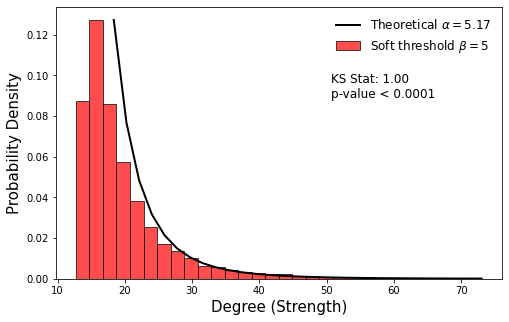

In [155]:
from scipy.stats import chi2_contingency
from scipy.stats import anderson_ksamp

# Step 3: Filter the nodes with strength >= x_min
power=5
alpha=-slope
degree = np.sum(dfnonsh_pow, axis=1)
nodes_to_keep = degree[(degree > x_min) & (degree < x_max)].index  # Get indices of nodes with strength > x_min

# Step 4: Create a new adjacency matrix with filtered nodes
dfnonsh_filtered = dfnonsh_pow.loc[nodes_to_keep, nodes_to_keep]
print(dfnonsh_filtered.shape)


degree = np.sum(dfnonsh_filtered, axis=1)

# Plot the degree distribution in log-log scale
plt.figure(figsize=(8, 5))

# Compute the histogram (degree distribution)
counts, bin_edges, _ = plt.hist(
    degree, bins=30, density=True, facecolor='red', alpha=0.7, edgecolor='black', 
    label=fr"Soft threshold $\beta = {power}$"
)

# Compute the theoretical power-law PDF
xmin = x_min  # Choose minimum value to define the power-law range
x = np.linspace(xmin, max(degree), 30)
theoretical_pdf = (alpha - 1) * xmin**(alpha - 1) * x**(-alpha)
# theoretical_pdf = (xmin**(power - 1)) * (x**-power)  # Power-law formula

# Scale the theoretical PDF to match the empirical histogram
scaling_factor = max(counts) / max(theoretical_pdf)  # Match peak values
theoretical_pdf *= scaling_factor

# Plot the theoretical power-law distribution
plt.plot(x, theoretical_pdf, 'k-', linewidth=2, label=fr"Theoretical $\alpha = {alpha:0.2f}$")

# Annotate KS-statistic and p-value below the legend
# ---- Perform Statistical Tests ----
# Compare theoretical vs empirical
ks_statistic, p_value = ks_2samp(degree, theoretical_pdf)


# Print the results
print(f"Kstat: {ks_statistic:.3f}")
print(f"p-value: {p_value:.3f}")

# Create legend and get its bounding box
legend = plt.legend(frameon=False, fontsize=12)
plt.gcf().canvas.draw()  # Force a draw to update legend size
bbox = legend.get_window_extent().transformed(plt.gca().transAxes.inverted())

# Get bottom position of the legend and place annotation below it
text_y = bbox.y0 - 0.05  # Slightly below legend

# Annotate KS-statistic and p-value below the legend
plt.text(
    bbox.x0, text_y, 
    f"KS Stat: {ks_statistic:.2f}\np-value{' < 0.0001' if p_value < 0.0001 else f': {p_value:.4f}'}", 
    transform=plt.gca().transAxes, fontsize=12, verticalalignment='top'
)


# Labels and title
plt.xlabel("Degree (Strength)", fontsize=15)
plt.ylabel("Probability Density", fontsize=15)
plt.legend(frameon=False, fontsize=12)

# Save and show the plot
plt.savefig(f"dcor/nonshock-adjPow{power}_theoretical.png", dpi=600, bbox_inches='tight', facecolor="white")
plt.show()

In [156]:
# Step 3: Filter the nodes with strength >= x_min
nodes_to_keep = degree[(degree > x_min) & (degree < x_max)].index  # Get indices of nodes with strength > x_min

# Step 4: Create a new adjacency matrix with filtered nodes
nonshock_pow = dfnonsh_pow.loc[nodes_to_keep, nodes_to_keep]
print(nonshock_pow.shape)

# Step 5: Save the filtered adjacency matrix to a text file
nonshock_pow.to_csv(f'dcor/nonshock_scalefree{power}.csv')
nonshock_pow.head(5)



(4849, 4849)


,44986,44990,44991,44993,45170,45171,45175,45176,45178,45180,...,ZNHIT1,ZNHIT6,ZNRD1,ZRANB2,ZSCAN5A,ZSWIM6,ZWINT,ZXDA,ZYX,ZZZ3
44986,1.000000,0.007627,0.001481,0.008984,0.021238,0.002026,0.037826,0.000657,0.002432,0.000556,...,0.000723,0.002650,0.000354,0.000293,0.006744,0.015910,0.000514,0.000762,0.002668,0.000965
44990,0.007627,1.000000,0.000725,0.004009,0.002987,0.000682,0.001364,0.001743,0.002176,0.001697,...,0.000092,0.001009,0.003124,0.000695,0.001042,0.005694,0.001259,0.000558,0.000199,0.001107
44991,0.001481,0.000725,1.000000,0.000656,0.005631,0.006892,0.004520,0.001016,0.000548,0.000553,...,0.013254,0.000190,0.000460,0.001459,0.001262,0.000179,0.000371,0.000233,0.002950,0.002967
44993,0.008984,0.004009,0.000656,1.000000,0.017130,0.001203,0.018307,0.002488,0.000503,0.007317,...,0.001462,0.000345,0.000687,0.001267,0.001305,0.001151,0.004608,0.000340,0.000398,0.001066
45170,0.021238,0.002987,0.005631,0.017130,1.000000,0.000148,0.077221,0.001586,0.002889,0.000483,...,0.000853,0.014874,0.000207,0.009978,0.005780,0.000528,0.002268,0.000419,0.001265,0.000526


### Shock network

In [140]:
dfshock = pd.read_csv("dcor/dcor_shock.csv", index_col=0)
dfshock.head(5)

,44986,44988,44989,44990,44991,44992,44993,44994,44995,44996,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
44986,1.000000,0.433678,0.782599,0.482797,0.550353,0.350446,0.372248,0.459573,0.556204,0.387088,...,0.317219,0.366424,0.427024,0.541247,0.302669,0.514203,0.357441,0.310696,0.270150,0.459290
44988,0.433678,1.000000,0.417738,0.337274,0.328232,0.372369,0.363153,0.345802,0.348738,0.407500,...,0.301661,0.343050,0.385846,0.371604,0.361609,0.400664,0.430886,0.366171,0.383954,0.450485
44989,0.782599,0.417738,1.000000,0.358043,0.409572,0.452594,0.363144,0.394708,0.425616,0.417953,...,0.306233,0.511621,0.466007,0.455461,0.401493,0.477344,0.430486,0.355138,0.339066,0.370314
44990,0.482797,0.337274,0.358043,1.000000,0.461209,0.335887,0.639926,0.426543,0.411214,0.336553,...,0.351797,0.582079,0.502504,0.488392,0.460067,0.402514,0.282278,0.490976,0.369674,0.330388
44991,0.550353,0.328232,0.409572,0.461209,1.000000,0.279255,0.426424,0.558411,0.537261,0.312075,...,0.345706,0.353071,0.343791,0.250058,0.278680,0.278124,0.484317,0.332084,0.229615,0.392750


No handles with labels found to put in legend.


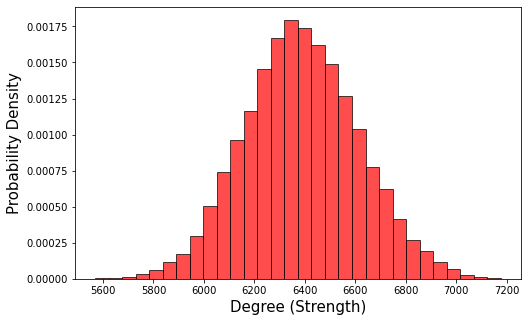

In [157]:
# Compute the degree (sum of weights) for each node
degree = np.sum(dfshock, axis=1)

# Plot the degree distribution in log-log scale
plt.figure(figsize=(8, 5))

# Compute the histogram (degree distribution)
counts, bin_edges, _ = plt.hist(degree, bins=30, density=True, facecolor='red', alpha=0.7, edgecolor='black') 
# Plot the degree distribution on a log-log scale
# plt.plot(bin_edges[:-1], counts, 'ro', markersize=5)

# plt.xscale("log")
# plt.yscale("log")

# Labels and title
plt.xlabel("Degree (Strength)", fontsize=15)
plt.ylabel("Probability Density", fontsize=15)
# plt.title("Histogram")
plt.legend(frameon=False, fontsize=12)
plt.savefig("dcor/shock-adjPow1.png", dpi=600, bbox_inches='tight', facecolor="white")
plt.show()

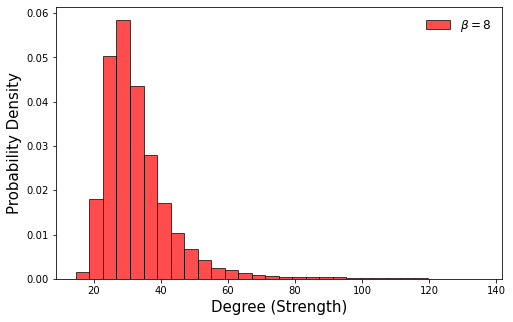

In [163]:
# Compute the degree (sum of weights) for each node
power = 8
dfshock_pow = dfshock.pow(power)
# Compute the degree (sum of weights) for each node
degree = np.sum(dfshock_pow, axis=1)

# Plot the degree distribution in log-log scale
plt.figure(figsize=(8, 5))

# Compute the histogram (degree distribution)
counts, bin_edges, _ = plt.hist(degree, bins=30, density=True, facecolor='red', alpha=0.7, edgecolor='black', label=fr"$\beta = {power}$") 
# Plot the degree distribution on a log-log scale
# plt.plot(bin_edges[:-1], counts, 'ro', markersize=5)

# plt.xscale("log")
# plt.yscale("log")

# Labels and title
plt.xlabel("Degree (Strength)", fontsize=15)
plt.ylabel("Probability Density", fontsize=15)
# plt.title("Histogram")
plt.legend(frameon=False, fontsize=12)
plt.savefig(f"dcor/shock-adjPow{power}.png", dpi=600, bbox_inches='tight', facecolor="white")
plt.show()

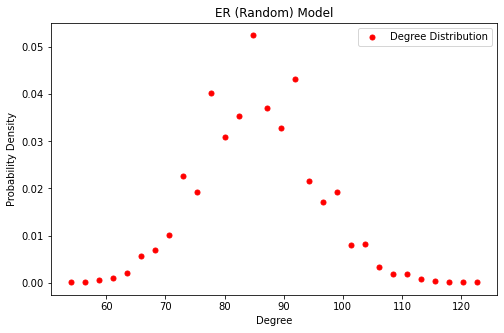

KS statistic: 0.4066666666666667, p-value: 0.0028429849558119225


In [112]:
from scipy import stats

# Step 1: Generate a scale-free network using the Barabási-Albert model
import networkx as nx 

n_nodes = len(degree)  # Number of nodes

p = np.mean(degree)/(n_nodes-1)  # Probability of edge creation

# Create a random graph with an exponential degree distribution
G_exp = nx.erdos_renyi_graph(n_nodes, p)

# Step 2: Create the adjacency matrix from the graph
M_binary = nx.to_numpy_array(G_exp)

# Step 3: Calculate the degree of each node in the network
degree1 = np.array([G_exp.degree(node) for node in G_exp.nodes])

# Plot the degree distribution in log-log scale
plt.figure(figsize=(8, 5))

# Compute the histogram (degree distribution)
counts1, bin_edges1 = np.histogram(degree1, bins=30, density=True)

# Plot the degree distribution on a log-log scale
plt.plot(bin_edges1[:-1], counts1, 'ro', markersize=5, label="Degree Distribution")
# plt.xscale("log")
# plt.yscale("log")

# Labels and title
plt.xlabel("Degree")
plt.ylabel("Probability Density")
plt.title("ER (Random) Model")
plt.legend()
plt.savefig("shock-ap_miPow9random.png", dpi=600, bbox_inches='tight', facecolor="white")
plt.show()

# Perform a KS test to compare the two distributions
ks_stat, ks_p_value = stats.ks_2samp(filtered_counts, counts1)
print(f"KS statistic: {ks_stat}, p-value: {ks_p_value}")

Estimated x_min: 26.78


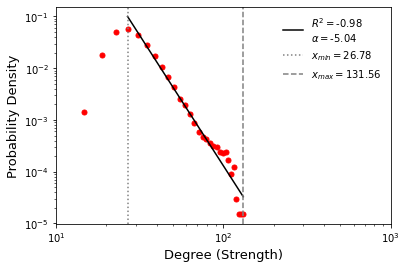

In [164]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
from matplotlib.ticker import FuncFormatter

# Compute the histogram (degree distribution)
# counts, bin_edges = np.histogram(degree, bins=np.logspace(np.log10(min(degree[degree>0])), np.log10(max(degree)), 30), density=True)

power = 8
# Plot the degree distribution on a log-log scale
plt.plot(bin_edges[:-1], counts, 'ro', markersize=5)

# Define the range for the linear fit (e.g., from the 5th to 20th percentile of degrees)
x_vals = bin_edges[:-1]
y_vals = counts

# Choose indices that cover the linear region of the plot
linear_region_mask = (x_vals > 23) & (x_vals < 200)  # Example: Filter degrees between 10 and 100 (adjust as needed)

# Linear regression on the selected region
slope, intercept, r_value, p_value, std_err = linregress(np.log(x_vals[linear_region_mask] + 1e-6), np.log(y_vals[linear_region_mask]+1e-6))

fit_y_vals = np.exp(intercept) * (x_vals[linear_region_mask]**slope)

# Plot the linear fit for visualization
plt.plot(x_vals[linear_region_mask], fit_y_vals, '-', color="black", label=r"$R^{2} = $"+f"{r_value:.2f}\n"+r"$\alpha = $"+f"{slope:.2f}")

# Mark the x_min (where the linear region starts)
x_min = min(x_vals[linear_region_mask])
x_max = max(x_vals[linear_region_mask])

plt.axvline(x=x_min, color='gray', linestyle='dotted', label=r"$x_{min} = $"+f"{x_min:.2f}")
plt.axvline(x=x_max, color='gray', linestyle='--', label=r"$x_{max} = $"+f"{x_max:.2f}")

# Display the plot
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Degree (Strength)', fontsize=13)
plt.ylabel('Probability Density', fontsize=13)

# Custom x-axis formatter to show ticks as 10^x
def format_func(value, tick_number):
    return r'$10^{%d}$' % int(np.log10(value))

# Set the x-axis ticks manually at 10^1, 10^2, 10^3, and 10^4
plt.xticks([10**i for i in range(1, 4)])

# Apply the custom formatter
plt.gca().get_xaxis().set_major_formatter(FuncFormatter(format_func))

plt.legend(loc='upper right', frameon=False)


# Print the x_min
print(f"Estimated x_min: {x_min:.2f}")
plt.savefig(f"dcor/shock-powerlaw{power}.png", dpi=600, bbox_inches='tight', facecolor="white")
plt.show()

(11784, 11784)
Kstat: 1.000
p-value: 0.000


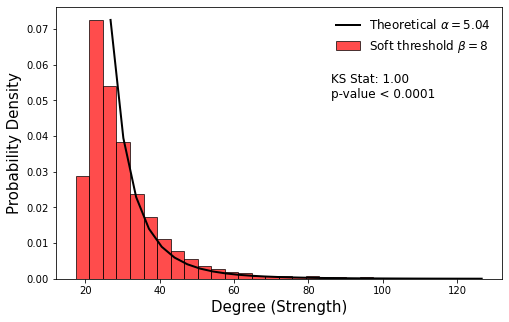

In [160]:
from scipy.stats import chi2_contingency
from scipy.stats import anderson_ksamp

# Step 3: Filter the nodes with strength >= x_min
power=8
alpha=-slope
degree = np.sum(dfshock_pow, axis=1)
nodes_to_keep = degree[(degree > x_min) & (degree < x_max)].index  # Get indices of nodes with strength > x_min

# Step 4: Create a new adjacency matrix with filtered nodes
dfshock_filtered = dfshock_pow.loc[nodes_to_keep, nodes_to_keep]
print(dfshock_filtered.shape)


degree = np.sum(dfshock_filtered, axis=1)

# Plot the degree distribution in log-log scale
plt.figure(figsize=(8, 5))

# Compute the histogram (degree distribution)
counts, bin_edges, _ = plt.hist(
    degree, bins=30, density=True, facecolor='red', alpha=0.7, edgecolor='black', 
    label=fr"Soft threshold $\beta = {power}$"
)

# Compute the theoretical power-law PDF
xmin = x_min  # Choose minimum value to define the power-law range
x = np.linspace(xmin, max(degree), 30)
theoretical_pdf = (alpha - 1) * xmin**(alpha - 1) * x**(-alpha)
# theoretical_pdf = (xmin**(power - 1)) * (x**-power)  # Power-law formula

# Scale the theoretical PDF to match the empirical histogram
scaling_factor = max(counts) / max(theoretical_pdf)  # Match peak values
theoretical_pdf *= scaling_factor

# Plot the theoretical power-law distribution
plt.plot(x, theoretical_pdf, 'k-', linewidth=2, label=fr"Theoretical $\alpha = {alpha:0.2f}$")

# Annotate KS-statistic and p-value below the legend
# ---- Perform Statistical Tests ----
# Compare theoretical vs empirical
ks_statistic, p_value = ks_2samp(degree, theoretical_pdf)


# Print the results
print(f"Kstat: {ks_statistic:.3f}")
print(f"p-value: {p_value:.3f}")

# Create legend and get its bounding box
legend = plt.legend(frameon=False, fontsize=12)
plt.gcf().canvas.draw()  # Force a draw to update legend size
bbox = legend.get_window_extent().transformed(plt.gca().transAxes.inverted())

# Get bottom position of the legend and place annotation below it
text_y = bbox.y0 - 0.05  # Slightly below legend

# Annotate KS-statistic and p-value below the legend
plt.text(
    bbox.x0, text_y, 
    f"KS Stat: {ks_statistic:.2f}\np-value{' < 0.0001' if p_value < 0.0001 else f': {p_value:.4f}'}", 
    transform=plt.gca().transAxes, fontsize=12, verticalalignment='top'
)


# Labels and title
plt.xlabel("Degree (Strength)", fontsize=15)
plt.ylabel("Probability Density", fontsize=15)
plt.legend(frameon=False, fontsize=12)

# Save and show the plot
plt.savefig(f"dcor/shock-adjPow{power}_theoretical.png", dpi=600, bbox_inches='tight', facecolor="white")
plt.show()

In [161]:
# Step 3: Filter the nodes with strength >= x_min
nodes_to_keep = degree[(degree > x_min) & (degree < x_max)].index  # Get indices of nodes with strength > x_min

# Step 4: Create a new adjacency matrix with filtered nodes
shock_pow = dfshock_pow.loc[nodes_to_keep, nodes_to_keep] 
print(shock_pow.shape)

# Step 5: Save the filtered adjacency matrix to a text file
# Step 5: Save the filtered adjacency matrix to a text file
shock_pow.to_csv(f'dcor/shock_scalefree{power}.csv')
shock_pow.head(5)

(6066, 6066)


,44990,44991,44992,44994,44996,45170,45171,45173,45175,45176,...,ZSCAN2,ZSCAN21,ZSCAN5A,ZSWIM6,ZSWIM7,ZUFSP,ZW10,ZXDB,ZYG11B,ZZEF1
44990,1.000000,0.002047,0.000162,0.001096,0.000165,0.000316,0.000940,0.000022,0.000340,0.004801,...,0.000304,0.001078,0.001308,0.000060,0.000550,0.000374,0.013584,0.003237,0.000040,0.000349
44991,0.002047,1.000000,0.000037,0.009454,0.000090,0.000856,0.000105,0.000294,0.001614,0.000593,...,0.118776,0.005387,0.000059,0.000783,0.000038,0.000124,0.001646,0.000015,0.003027,0.000008
44992,0.000162,0.000037,1.000000,0.000590,0.005836,0.000680,0.001576,0.036726,0.000233,0.000252,...,0.000036,0.000283,0.000131,0.002851,0.001125,0.002110,0.000925,0.001238,0.002499,0.008008
44994,0.001096,0.009454,0.000590,1.000000,0.004959,0.029402,0.000102,0.004893,0.026552,0.000063,...,0.007722,0.000357,0.004743,0.004008,0.003724,0.001835,0.006630,0.000326,0.000476,0.003106
44996,0.000165,0.000090,0.005836,0.004959,1.000000,0.008734,0.000831,0.008675,0.001067,0.013063,...,0.000210,0.000679,0.000373,0.000260,0.000741,0.000492,0.000177,0.000766,0.000609,0.001314


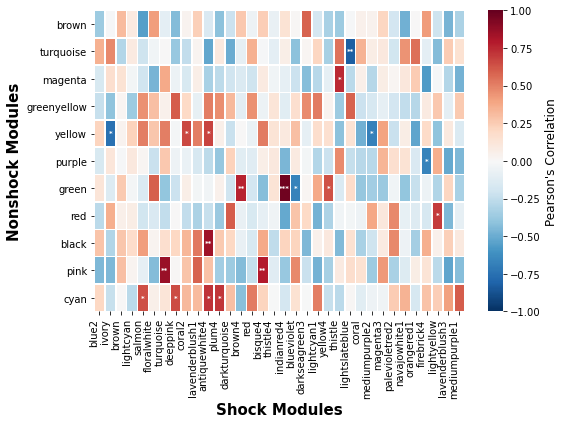

In [39]:
import seaborn as sns
import networkx as nx
import matplotlib.pyplot as plt

def annotate_significance(pval):
        if pval < 0.001:
            return '***'
        elif pval < 0.01:
            return '**'
        elif pval < 0.05:
            return '*'
        else:
            return ''

pval_matrix = pd.read_csv("correxp-v2/nonshockVsshock-corrMat-serial-pval.csv",index_col=0)
correlation_matrix = pd.read_csv("correxp-v2/nonshockVsshock-corrMat-serial-corr.csv",index_col=0)
# Create annotation matrix
annotation_matrix = pval_matrix.applymap(annotate_significance)
annotation_matrix

# Plot the heatmap
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(
    correlation_matrix,
    vmin=-1, vmax=1,  # Set color range for correlation
    cmap="RdBu_r",  # Custom Red-Blue colormap 
    annot=annotation_matrix.values,  # Annotate with significance
    annot_kws={"fontsize": 7, "fontweight": "bold", "color":"white"},
    fmt='',  # No formatting for annotations
    cbar_kws={'label': 'Correlation'},  # Add colorbar label
    linewidths=0.5  # Add lines between cells
)
# Access the colorbar and modify the label font size
cbar = heatmap.collections[0].colorbar
cbar.set_label("Pearson's Correlation", fontsize=12)  # Set font size of the colorbar label

# Improve label formatting
plt.xticks(rotation=90, ha="right", fontsize=10)
plt.yticks(fontsize=10)
plt.title(f"", fontsize=14)
plt.xlabel("Shock Modules", fontsize=15, fontweight="bold")
plt.ylabel("Nonshock Modules", fontsize=15, fontweight="bold")

# Adjust layout for better spacing
plt.tight_layout()

# Save the plot
plt.savefig("correxp-v2/nonshockVsshock-corrmat.png", dpi=300, bbox_inches='tight', facecolor="white")  # Save with high resolution and tight b

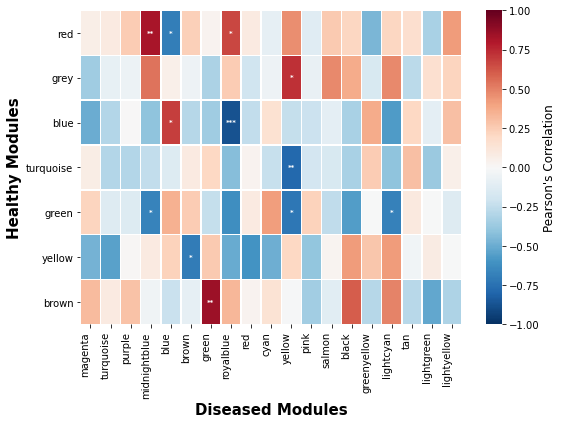

In [38]:
import seaborn as sns
import networkx as nx
import matplotlib.pyplot as plt

def annotate_significance(pval):
        if pval < 0.001:
            return '***'
        elif pval < 0.01:
            return '**'
        elif pval < 0.05:
            return '*'
        else:
            return ''

pval_matrix = pd.read_csv("correxp-v2/healthyVsdiseased-corrMat-serial-pval.csv",index_col=0)
correlation_matrix = pd.read_csv("correxp-v2/healthyVsdiseased-corrMat-serial-corr.csv",index_col=0)
# Create annotation matrix
annotation_matrix = pval_matrix.applymap(annotate_significance)
annotation_matrix

# Plot the heatmap
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(
    correlation_matrix,
    vmin=-1, vmax=1,  # Set color range for correlation
    cmap="RdBu_r",  # Custom Red-Blue colormap 
    annot=annotation_matrix.values,  # Annotate with significance
    annot_kws={"fontsize": 7, "fontweight": "bold", "color":"white"},
    fmt='',  # No formatting for annotations
    cbar_kws={'label': 'Correlation'},  # Add colorbar label
    linewidths=0.5  # Add lines between cells
)
# Access the colorbar and modify the label font size
cbar = heatmap.collections[0].colorbar
cbar.set_label("Pearson's Correlation", fontsize=12)  # Set font size of the colorbar label

# Improve label formatting
plt.xticks(rotation=90, ha="right", fontsize=10)
plt.yticks(fontsize=10)
plt.title(f"", fontsize=14)
plt.xlabel("Diseased Modules", fontsize=15, fontweight="bold")
plt.ylabel("Healthy Modules", fontsize=15, fontweight="bold")

# Adjust layout for better spacing
plt.tight_layout()

# Save the plot
plt.savefig("correxp-v2/healthyVsdiseased-corrMat.png", dpi=300, bbox_inches='tight', facecolor="white")  # Save with high resolution and tight b